# **Decision Trees and Random Forest Project: Predicting Potential Customers**

# **Marks: 60**

Welcome to the project on classification using Decision Tree and Random Forest.

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market, would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education. 

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as **leads**. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure.
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.


----------------------------
## **Objective**
-----------------------------


ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time spent on the website
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not.

## **Importing the necessary libraries and overview of the dataset**

In [152]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics


# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the dataset**

In [153]:
learn = pd.read_csv("/Users/Xugao/Desktop/MIT ADSP/elective project/practical data science/ExtraaLearn.csv")

In [154]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

### **View the first and the last 5 rows of the dataset**

In [155]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [156]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### **Understand the shape of the dataset**

In [157]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

### **Check the data types of the columns in the dataset**

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.

* There are **no null values** in the dataset.

In [159]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (4 Marks)

In [160]:
# Write your code

data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


**Observations:__

*Users' mean age is 46, which means the major target users is middle age people
*25% of users are below 36 years old, which means 75% of users are above 36 years old 
* Age ranges from 18 to 63, which covers a big range
* The mean websites_visits times is around 4, and 75% of users visits more than twice
and the max times of 30 times that is pretty far from mean, might be a outliner
* The average time_spent_on_website is 724 and the Standard Deviation is 744 that is hugh, representing the that values are generally far from the mean
* It is realized that the mininum of time_spent is 0 while the max one is 2537, which is the reason why the std is big.
* The mean page_views_per_vists is 3, and 75% users visits more that 2 pages per vists, and the max pages visits is 19.
* 75% of users shows 1 in status, which means only 25% of them converted to paid customers in the end.
also, based on 0.3 mean in status, it's inferred that most of users are converted to paid ones.

In [161]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)


# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT1135    0.000217
EXT3975    0.000217
EXT2795    0.000217
EXT1309    0.000217
EXT3397    0.000217
             ...   
EXT3457    0.000217
EXT2574    0.000217
EXT4612    0.000217
EXT3553    0.000217
EXT2312    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [162]:
# Checking the number of unique values
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [163]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

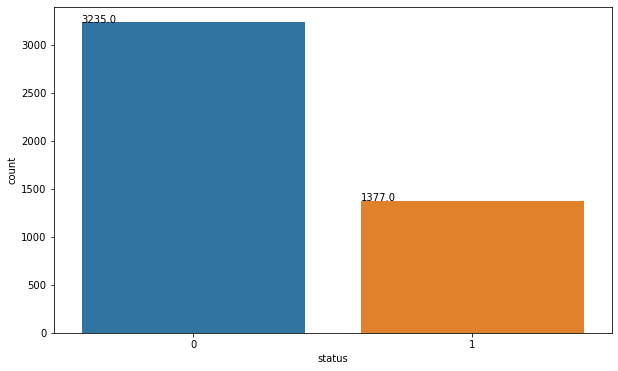

In [164]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.35))

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

### **Question 2: Provide observations for below distribution plots and box plots. (4 Marks)**


age
Skew : -0.72


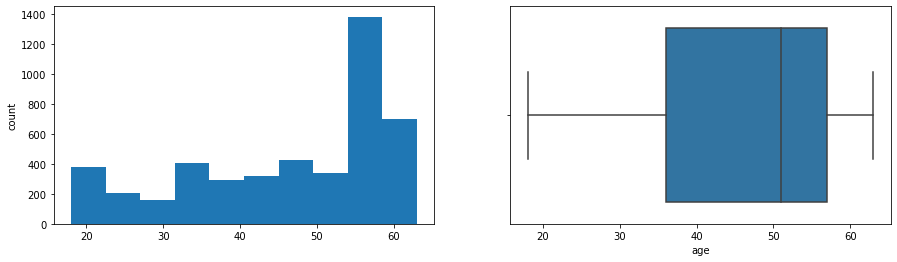

website_visits
Skew : 2.16


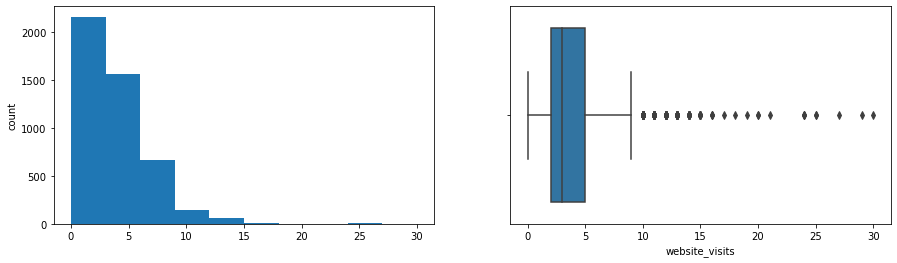

time_spent_on_website
Skew : 0.95


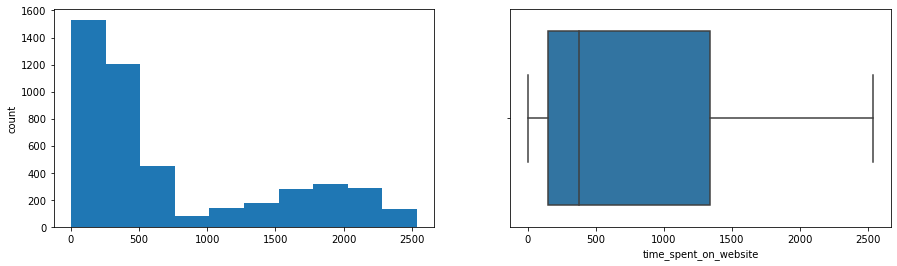

page_views_per_visit
Skew : 1.27


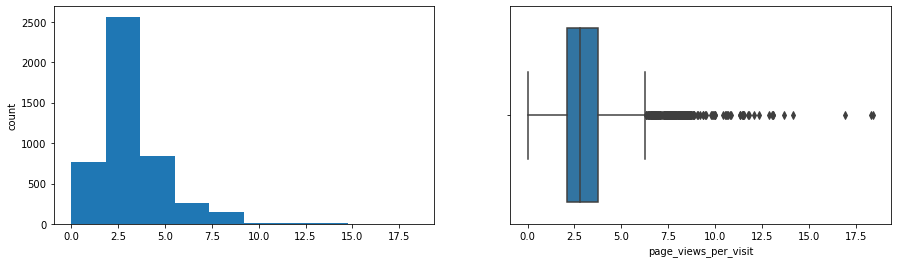

In [165]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:___________**

* The distribution of age shows left skewed that mean most users are above middle age, we can see from boxplot, 75% are below arounf 58, so most appears 40-50.
* As the histplot showing right skewed, Most wesite vists centered between 0-5. also the boxplot show 75% are below 5 with several outliners above 5.
* the time spent distribution indicates right skewed, which means most time spent are under 500. Based boxplot, 75% users spent under around 1300.
*  According to hist plot, it page_per_vists shows normal distribution to some extent, as most proportion stays 
around 2.5, and it's inferered from boxplot that meadin page_views_per_vists is 2.5 as well, also 75% users views less around 4 pages for per visits with several outliners.

### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

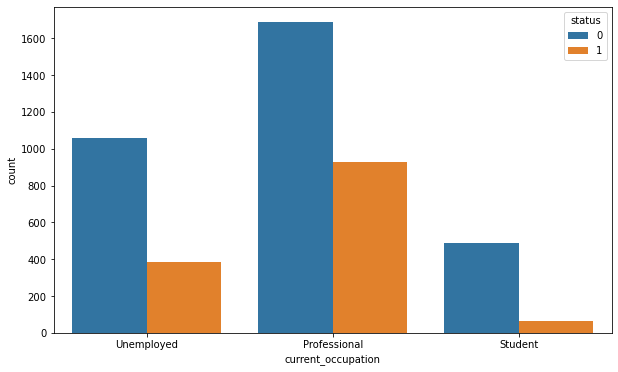

In [166]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this.**

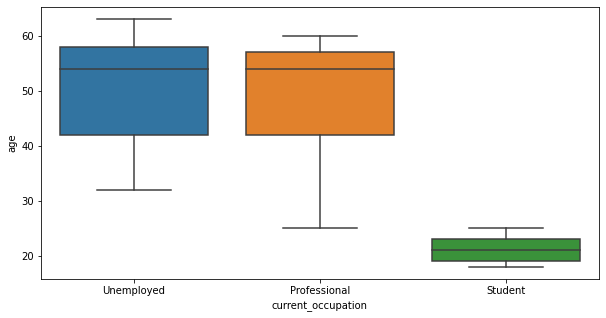

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [167]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["current_occupation"], data["age"])

plt.show()

plt.figure()

In [168]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads.**

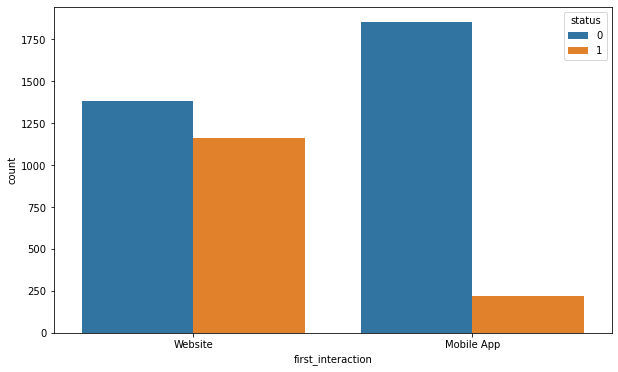

In [169]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

**We observed earlier that some leads spend more time on websites than others. Let's analyze if spending more time on websites results in conversion.**

### **Question 3:** 
- **Create a boxplot for variables 'status' and 'time_spent_on_website' (use sns.boxplot() function) (1 Mark)**
- **Provide your observations from the plot (2 Marks)**

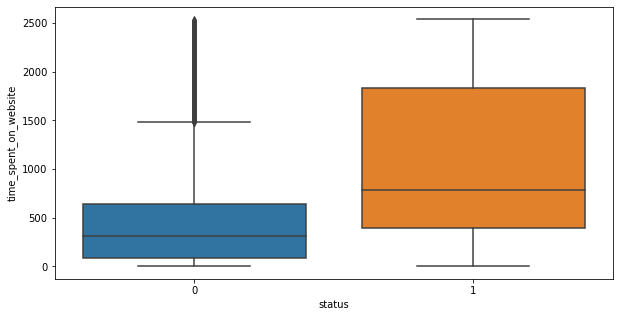

In [170]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["status"],data["time_spent_on_website"]) # Write your code here

plt.show()

**Observations:_______**

* the time_spent_on_website of status 0 are usually less than paid users
* since Q1 for 0 status is arounf 100, 75% of status 0 users spend above 100 for time_spent_on_website, and Q1 for 1 status is around 400, so 75% of them time_spent_on_website is above 400
* median time_spent_on_website is around 750 for status 1 uers

**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead coversion**

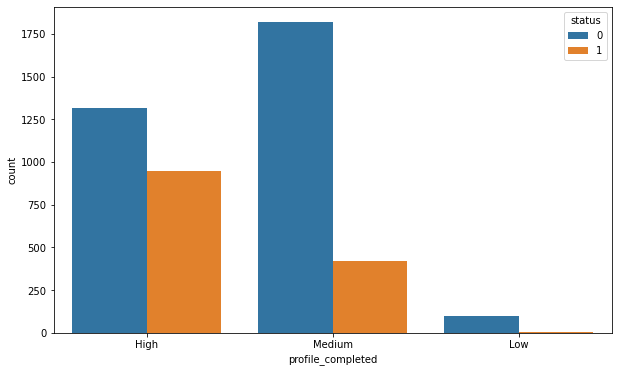

In [171]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with a very low cost of advertisement. Let's see how referrals impact lead conversion status.**

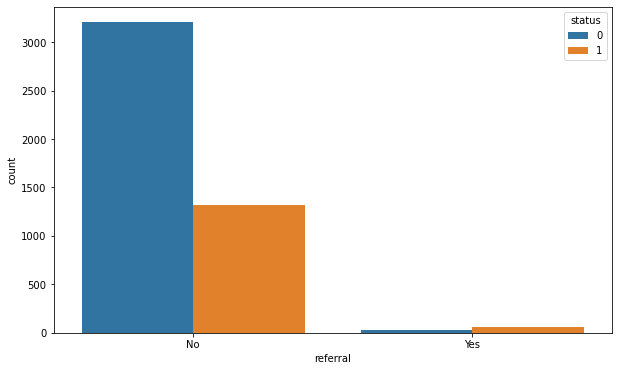

In [172]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

**Observations:**
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

### **Question 4:** Write the code to plot the correlation heatmap and write your observations based on that. (4 Marks)

In [173]:
num_col = pd.DataFrame(data,columns=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit'])

num_col.corr()

,age,website_visits,time_spent_on_website,page_views_per_visit
age,1.000000,-0.011975,0.018885,-0.040675
website_visits,-0.011975,1.000000,0.062300,0.074094
time_spent_on_website,0.018885,0.062300,1.000000,0.068130
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000


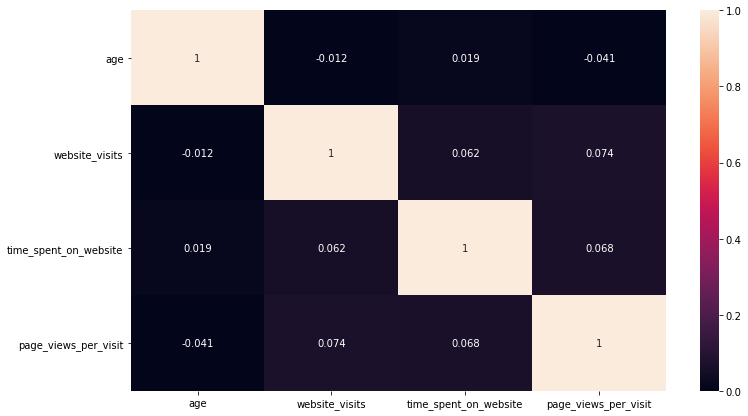

In [174]:
plt.figure(figsize = (12, 7))

sns.heatmap(num_col.corr(), annot= True, vmin =0, vmax =1)

plt.show()

**Observations:__**

* the relationship between age and website_visits shows negatively related.
* the website_visits and page_views_per_visit is bit strongly positive related
* the time_spent_on_webiste and website_visits is bit strongly positive related
* the relation between age and page_views_per_vists is negative related

## **Data preparation for modeling**

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test sets to be able to evaluate the model that we build on the train data.

In [105]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

In [175]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [176]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [177]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. 

### **Which case is more important?** 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

### **How to reduce the losses?**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [180]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree**

### **Question 5:**

- **Fit the decision tree classifier on the training data (use random_state=7) (2 Marks)**
- **Check the performance on both training and testing datasets (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [181]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 7)

d_tree = d_tree.fit(X_train, y_train)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



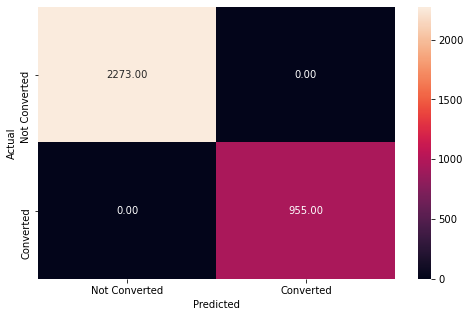

In [182]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:_________**
* the decision tree gives 100% score for all metrics on the training dataset


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       962
           1       0.69      0.67      0.68       422

    accuracy                           0.81      1384
   macro avg       0.78      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



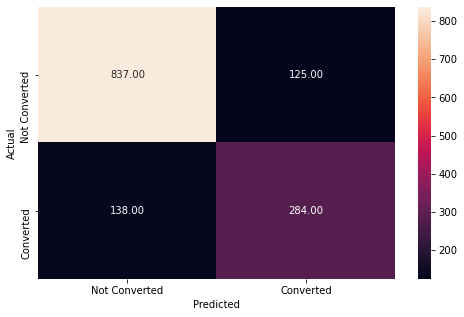

In [183]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:_________**
* the decision tree works well on training data, while not works well on test data
* the precision on test data means 31%(1-69%) is predicted to converted to paid users while actually not, and company will waster money on those  users.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [184]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **Question 6:**
- **Check the performance on both training and testing datasets (4 Marks)**
- **Compare the results with the results from the decision tree model with default parameters and write your observations (4 Marks)**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



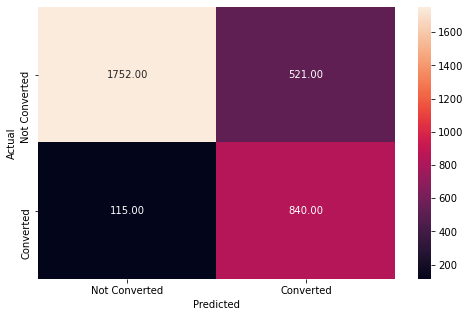

In [185]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_train2)

**Observations:
*In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly.This makes sense because we are trying to reduce overfitting.


**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



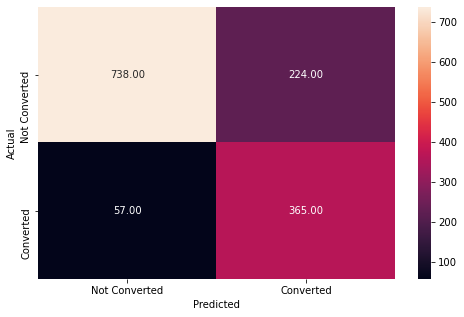

In [186]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

**Observations:__________**
* The precision for train and test data is getting lower, it means the model works not that well on test data, but the overfitting reduced
* the recall improved from 0.67 to 0.86 after tuning parameters,
 the chance of minimizing false negative is increased

**Let's visualize the tuned decision tree** and observe the decision rules:

### **Question 7: Write your observations from the below visualization of the tuned decision tree. (5 Marks)**

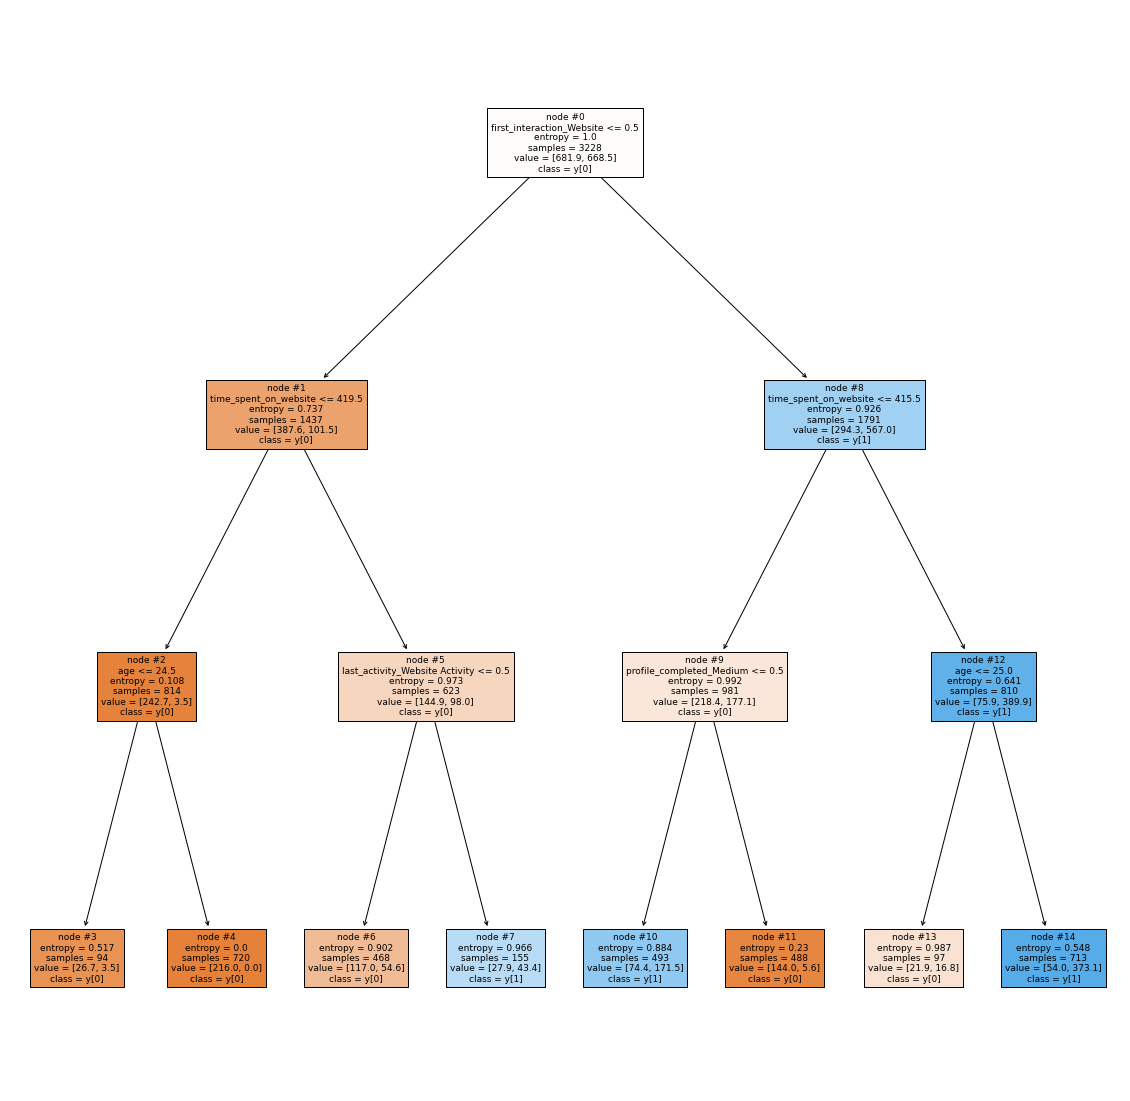

In [187]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

* first_interaction_website less than 0.5 and time_spent_onwebsite <= 419.5, meanwhile users are equal or less than 24.5 are mostly failed to converted leads
* for those first_interaction_website >= 0.5 and time_spent on website > 415.5 is likely to converted leads.
* for those first interaction website time > 0.5, and time_spent on website < 415.5, profile_completed_medium >0.5 are likely converted leads, it indicats profile completion is better, there is bigger chance for converting leads.
* for those first_interaction website > 0.5 and time spent website < 415.5 , while age > 25 are converted to leads. So is seems the time spent on first interaction as well as older age positively impact leads converation.
*  For those first interction_website <= 0.5 and time_spent_websit <= 419.5, meanwhile users last activity website activity > 0.5, they are tend to converted leads.So even neither the either first interation website time nor time_spent_website is much, if the last activity time is > 0.5, there are small possibilities converted to leads.


**Let's look at the feature importance** of the tuned decision tree model

In [188]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


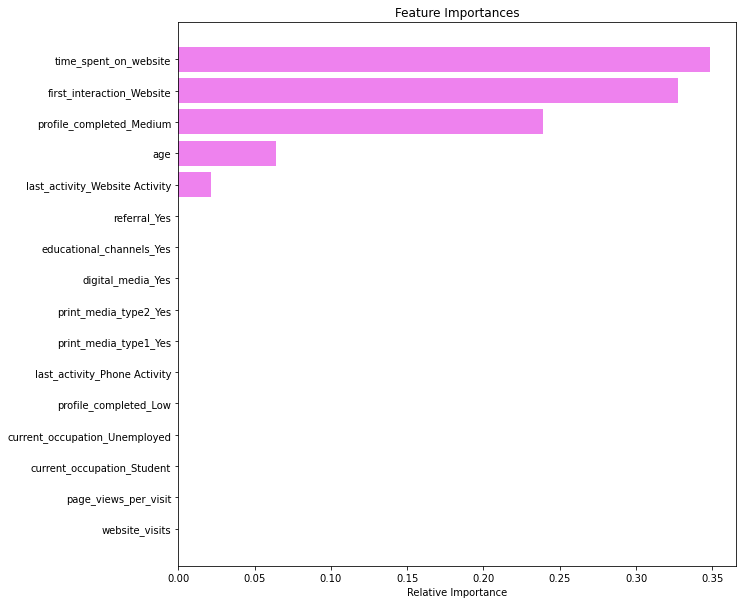

In [123]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### **Question 8:** 
- **Fit the random forest classifier on the training data (use random_state = 7) (2 Marks)**
- **Check the performance on both training and testing data (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [189]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0:0.17,1:1.83},random_state=7)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 1.83}, random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



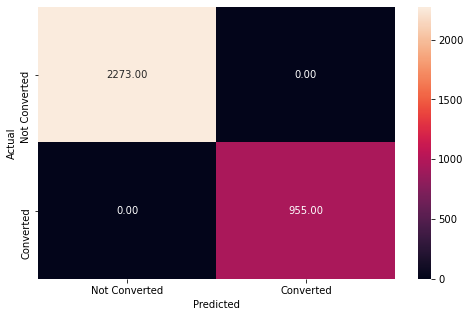

In [190]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

**Observations:
*the random forest is giving a 100% score for all metrics on the training dataset.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



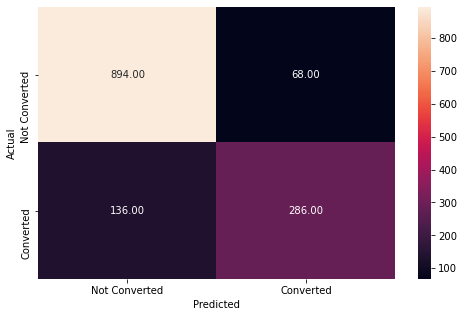

In [191]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:____**

* The random forest classifier seems to be overfitting the training data, the recall on the training data
  is 1, while the recall on the test data is only~0.7
* precision is relativly high for the test data

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [192]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [197]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



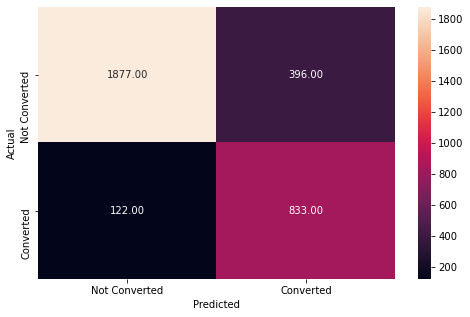

In [198]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

### **Question 9:**
- **Tune the random forest classifier using GridSearchCV (4 Marks)**
- **Check the performance on both training and testing datasets (2 Marks)**
- **Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)**

**Note:** The below code might take some time to run depending on your system's configuration.

In [196]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.7, 1: 0.3}, "balanced", {0: 0.4, 1: 0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv=5)

grid_obj = grid_obj.fit(X_train,y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



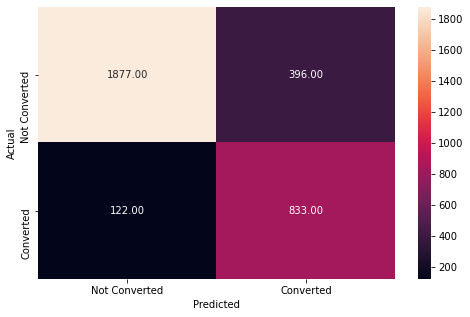

In [200]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train,y_pred_train5)

**Observations:________**
* compared with default parameter, the precision decreased from 1 to 0.68,
  it make sense as the default parameter model is overfitting


**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



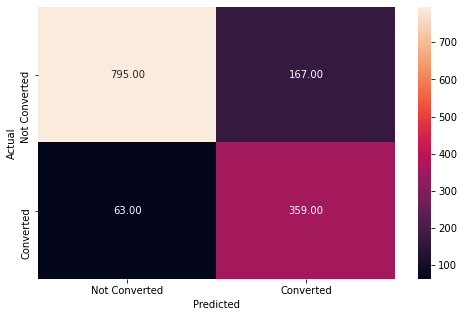

In [201]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test,y_pred_test5)

**Observations:___________**
* the reacall increased from 0.67 to 0.85 after paramter tuned, which minimize false negatives.

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

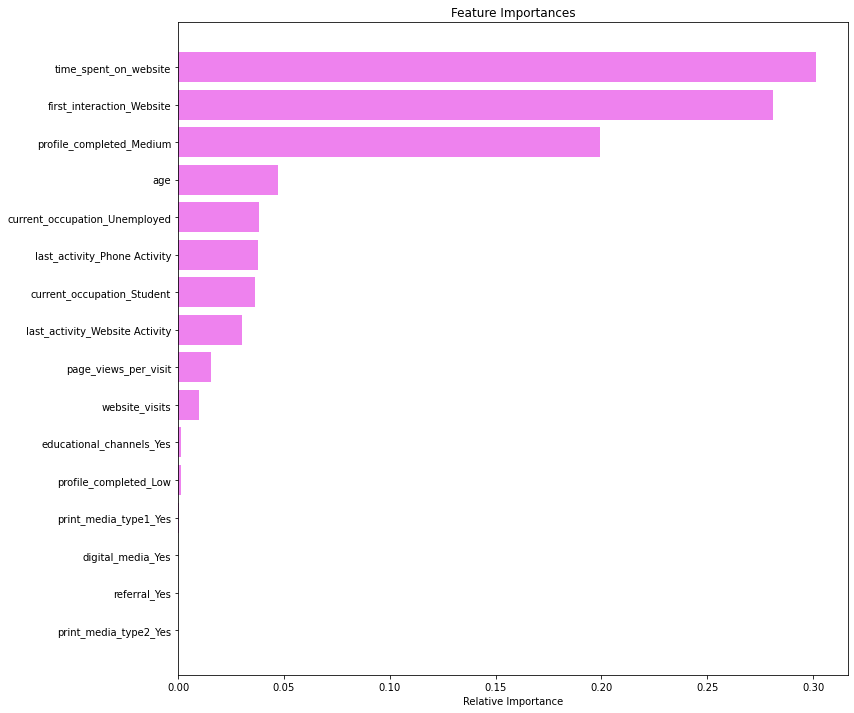

In [202]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Question 10:**

**Write your conclusions on the key factors that drive the conversion of leads and write your recommendations to the business on how can they improve the conversion rate. (10 Marks)**

### **Conclusions:________**
* The best model we have got so far is the tuned random forest model which is giving nearly ~ 86% recall for class 1 on the test data.
* The company should use this model to know beforehand which employee is going to convert lead and act accordingly.
* time spent on website, first_interaction_website, profile_completed, and age are the top four features.

### **Business Recommendations_____**

* The distribution of age shows left skewed that mean most users are above middle age, we can see from boxplot, 75% are below arounf 58, so most appears 40-50. The company should target this age group as target customer.
* As the histplot showing right skewed, Most website vists centered between 0-5. also the boxplot show 75% are below 5 with several outliners above 5. So the company should pay more attentions on homepage to attract visitors.
* The leads whose profile completion level is high converted more in comparison to other levels of profile completion. So the compnay should courage users to complete their profiles.
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.
* Based on decision tree, for those first_interaction_website >= 0.5 and time_spent on website > 415.5 is likely to converted leads.
* So the company should try to optimize website to increase users'first interaction time and time_spent_website.
* for those first interaction website time > 0.5, and time_spent on website < 415.5, profile_completed_medium >0.5 are likely converted leads, it indicats profile completion is better, there is bigger chance for converting leads.So the company should try to website optimization as well as encouraging measure on profile competion, which is positively impacted on conversion.
* for those first_interaction website > 0.5 and time spent website < 415.5 , while age > 25 are converted to leads. So is seems the time spent on first interaction as well as older age positively impact leads converation. So the company should pay more attentions on those age> 25 and first_interaction website > 0.5 as potential customers.
*  For those first interction_website <= 0.5 and time_spent_websit <= 419.5, meanwhile users last activity website activity > 0.5, they are tend to converted leads.So even neither the either first interation website time nor time_spent_website is much, if the last activity time is > 0.5, there are small possibilities converted to leads. Thus, company shold target those spent more on last acitivity time as they are potential leads.
* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.Thus, the company should put more efforts on website business than mobile.
* time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.So the company should put most efforts on webiste optimizaiton and desige to increase user first_interaction_time and time spent total, also company should deduct more ways of encouraging users complete profile and narrow their major customer group to middle age people.
